In [1]:
import gym
from gym import wrappers
import torch as pt

import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange, tqdm

import io
import base64
from IPython.display import HTML

# Comment out for debugging
import warnings
warnings.filterwarnings('ignore')

In [2]:
def play_video(ep_number: int):
    video = io.open(f"./gym-results/rl-video-episode-{ep_number}.mp4", 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''
        <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
    .format(encoded.decode('ascii')))

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='valid')
    return y_smooth

100%|██████████| 1000/1000 [00:00<00:00, 1085.91it/s]


Text(0.5, 1.0, 'Rewards over 2 episodes')

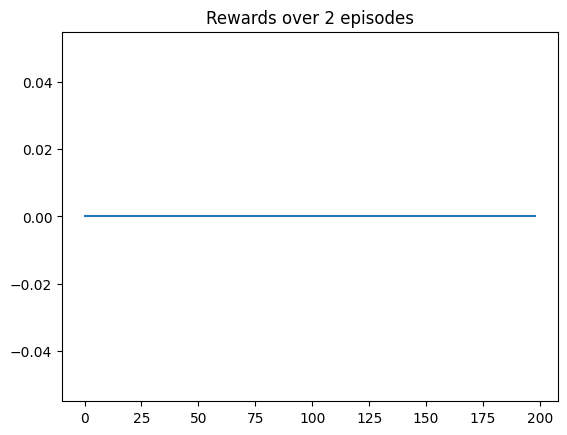

In [7]:
env = gym.make("ALE/Pong-v5")
env = wrappers.RecordVideo(env, "./gym-results", new_step_api=True)
env.reset(seed=42)

# hyperparams
num_steps = 1000
random_rewards = [0]
random_lengths = [0]
ep_len = 0
for _ in trange(num_steps):
   action = env.action_space.sample() 
   observation, reward, done, info, _ = env.step(action)

   if done:
      random_rewards.append(reward)
      random_lengths.append(ep_len)
      observation = env.reset()
      ep_len = 0
   
   ep_len += 1
env.close()

plt.plot(smooth(random_rewards, 200))
plt.title(f"Rewards over {len(random_rewards)} episodes")

In [8]:
play_video(0)